---
title: "GERON - END-TO-END PROJECT"
author: "Kwabena Asabere"
df-print: kable
code-overflow: wrap
execute:
    echo: true
    warning: false
    message: false
format: html
---

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PolynomialFeatures,FunctionTransformer,MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,cross_val_predict,GridSearchCV
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.impute import SimpleImputer

In [203]:
from xgboost import XGBRegressor,XGBClassifier
from lightgbm import LGBMRegressor,LGBMClassifier

In [204]:
wine = pd.read_csv(r"C:\Users\KAsab\Downloads\winequality-red.csv")

In [205]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [206]:
heart = pd.read_csv(r"C:\Users\KAsab\Desktop\Analysis_Workshop\data\south_africa_heart.csv")

In [207]:
heart.head()

,CLASS,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,-1,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,1,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,1,134,13.60,3.50,27.78,1,60,25.99,57.34,49


In [208]:
diamonds = pd.read_csv(r"C:\Users\KAsab\Desktop\GERON\gemstone.csv")

In [209]:
#dmnds = pd.read_csv(r"C:\Users\KAsab\Desktop\GERON\diamonds_large.csv")

In [210]:
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [211]:
diamonds = diamonds.iloc[:,1:]

In [212]:
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


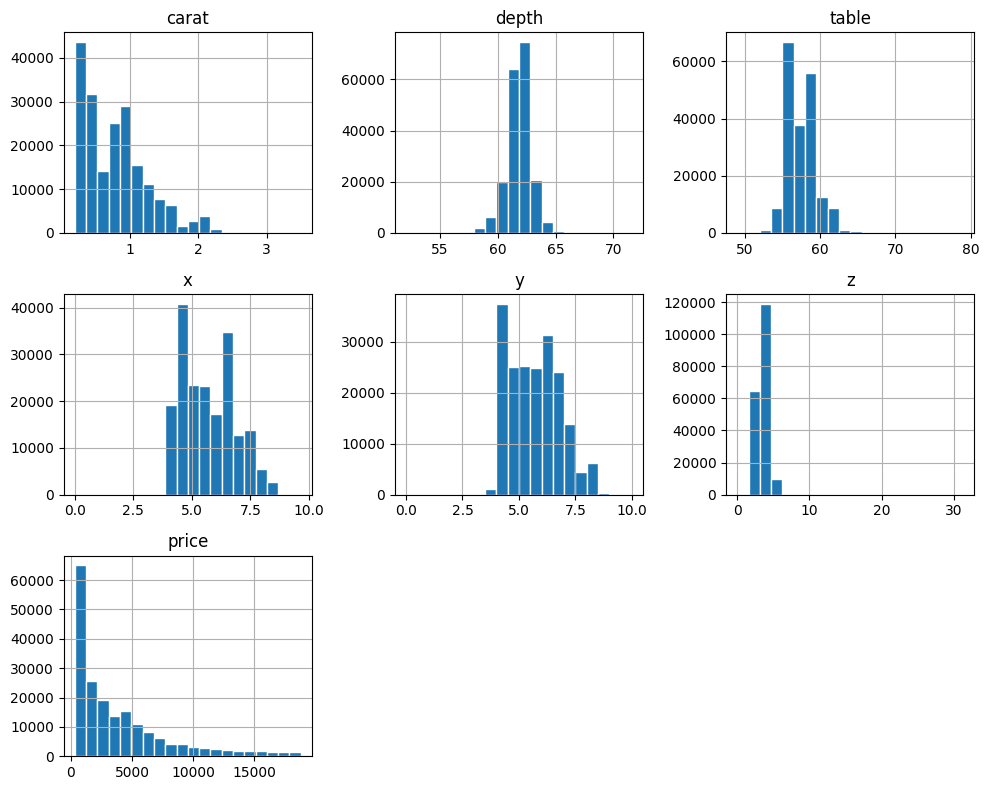

In [213]:
diamonds.hist(figsize = (10,8),bins = 20,edgecolor = "white")
plt.tight_layout()
plt.show()

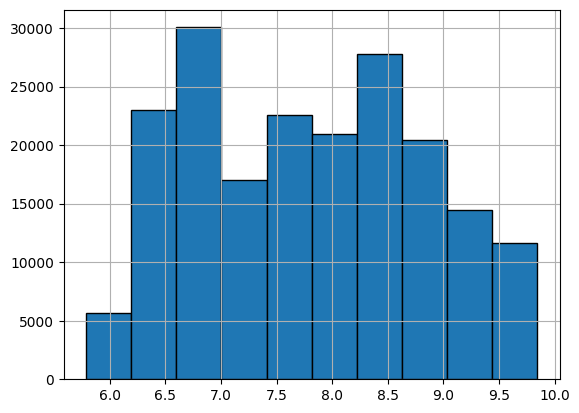

In [214]:
np.log(diamonds["price"]).hist(bins = 10,edgecolor = "black")
plt.show()

In [215]:
# Iterate over selected columns and calculate value_counts
value_counts_list = [diamonds[column].value_counts() for column in diamonds.iloc[:, 1:4].columns]

# Display the results
for counts in value_counts_list:
    print(f"\n{counts}\n")



cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64


color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64


clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64



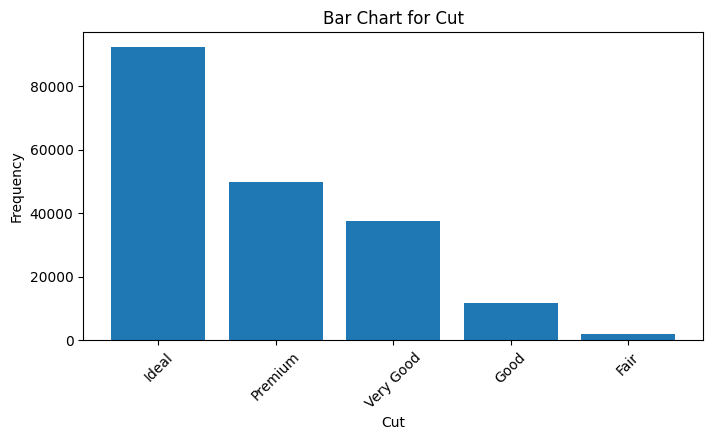

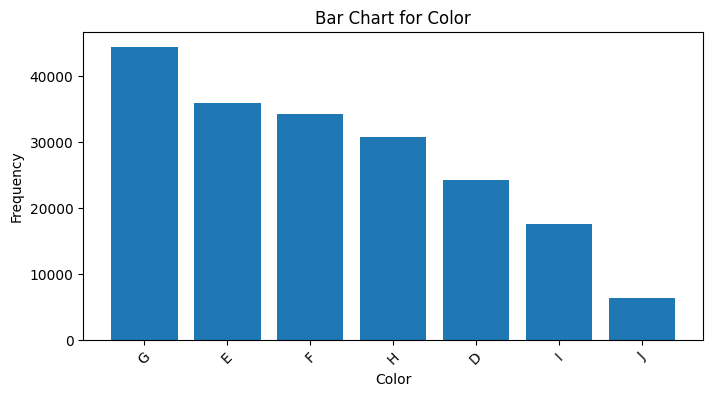

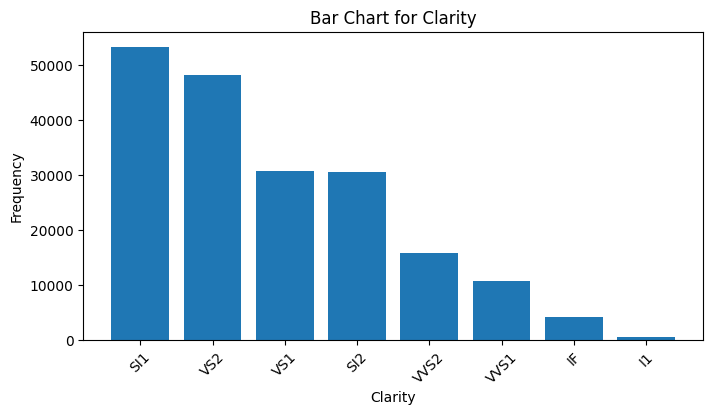

In [264]:
for column in diamonds.select_dtypes(include = "object").columns:
    counts = diamonds[column].value_counts()
    plt.figure(figsize=(8, 4))
    plt.bar(counts.index, counts.values)
    plt.title(f"Bar Chart for {column.title()}")
    plt.xlabel(column.title())
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()


In [218]:
cf = diamonds["clarity"].value_counts()
print(cf.index)
print(cf.values)

Index(['SI1', 'VS2', 'VS1', 'SI2', 'VVS2', 'VVS1', 'IF', 'I1'], dtype='object', name='clarity')
[53272 48027 30669 30484 15762 10628  4219   512]


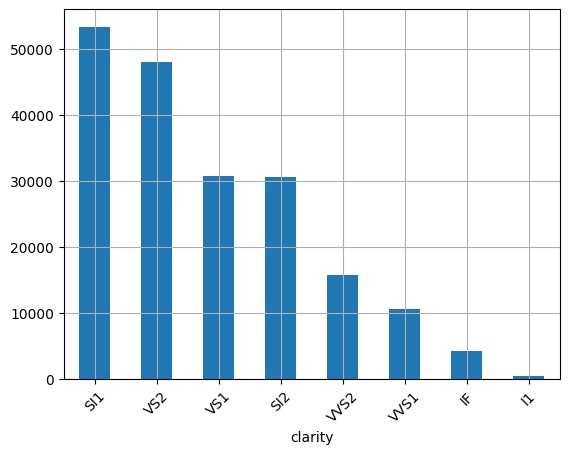

In [219]:
diamonds["clarity"].value_counts().plot.bar()
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [220]:
X = diamonds.drop(columns = ["price"])
y = np.log1p(diamonds["price"])

In [221]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [222]:
xgb = XGBRegressor(random_state = 42)
lgbm = LGBMRegressor(random_state = 42)

In [223]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
dtypes: float64(6), object(3)
memory usage: 13.3+ MB


In [224]:
num_features = X.select_dtypes(include = "number").columns.to_list()
cat_features = X.select_dtypes(include = "object").columns.to_list()

In [225]:
cat_pipeline = make_pipeline(SimpleImputer(strategy = "most_frequent"),OneHotEncoder(sparse_output = False,handle_unknown = "ignore"))
num_pipeline = make_pipeline(SimpleImputer(strategy = "median"),StandardScaler())

In [226]:
preprocessor = make_column_transformer(
    [num_pipeline,num_features],
    [cat_pipeline,cat_features]
)

In [227]:
xgb_pipeline = make_pipeline(preprocessor,xgb)

In [228]:
param_grid = {
   "xgbregressor__max_depth":[3,5,7,10]
}

In [229]:
xgb_grid = GridSearchCV(
    xgb_pipeline,
    param_grid,
    cv = 5,
    scoring = "neg_root_mean_squared_error",
    n_jobs = -1,
    verbose = 1
)

In [230]:
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'x',
                                                                          'y',
                                                                          'z']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('oneho...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1, param_grid={'xgbregressor__max_depth': [3, 5, 7, 10]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [231]:
print("Best Parameters:",xgb_grid.best_params_)

Best Parameters: {'xgbregressor__max_depth': 7}


In [232]:
print(f"Best parameters:{xgb_grid.best_params_}")
print(f"Best score:{xgb_grid.best_score_}")

Best parameters:{'xgbregressor__max_depth': 7}
Best score:-0.10640924251472461


In [233]:
best_model = xgb_grid.best_estimator_

In [234]:
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

In [235]:
root_mean_squared_error(y_test_original,y_pred)

587.0026045920839

In [236]:
r2_score(y_test_original,y_pred)

0.9786769118322607

### LGBM Regression

In [237]:
lgbm_pipeline = make_pipeline(preprocessor,lgbm)

In [238]:
param_grid = {"lgbmregressor__max_depth":[3,5,7,10]}

In [239]:
lgbm_grid = GridSearchCV(
    lgbm_pipeline,
    param_grid,
    cv = 5,
    scoring = "neg_root_mean_squared_error",
    n_jobs = -1,
    verbose = 1
)

In [241]:
lgbm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1257
[LightGBM] [Info] Number of data points in the train set: 154858, number of used features: 26
[LightGBM] [Info] Start training from score 7.791978


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'x',
                                                                          'y',
                                                                          'z']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity'])])),
                                       ('lgbmregressor',
                                        LGBMRegressor(random_state=42))]),
             n_jobs=-1, param_grid={'lgbmregressor__max_depth': [3, 5, 7, 10]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [244]:
print(f"Best Parameters:{lgbm_grid.best_params_}")
print(f"Best score:{lgbm_grid.best_score_}")

Best Parameters:{'lgbmregressor__max_depth': 10}
Best score:-0.10617256243117557


In [255]:
best_model_lgbm = lgbm_grid.best_estimator_

In [261]:
y_pred_log = best_model_lgbm.predict(X_test)
y_pred_lgbm = np.expm1(y_pred_log)

In [262]:
root_mean_squared_error(y_test_original,y_pred_lgbm)

587.0309447714875

In [263]:
r2_score(y_test_original,y_pred_lgbm)

0.9786748528474213